In [1]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pytz
import re
from collections import Counter

In [2]:
path = "/content/drive/MyDrive/Colab Notebooks/final_dataset_2025_for_release.csv"
df = pd.read_csv(path)
print(df)

<ipython-input-2-bded4bb061a2>:2: DtypeWarning: Columns (32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


                      created_at  \
0       2025-02-10T03:16:57.000Z   
1       2025-02-10T03:16:49.000Z   
2       2025-02-10T03:16:48.000Z   
3       2025-02-10T03:16:46.000Z   
4       2025-02-10T03:16:46.000Z   
...                          ...   
123142  2025-02-10T02:37:52.000Z   
123143  2025-02-10T02:37:47.000Z   
123144  2025-02-10T02:37:47.000Z   
123145  2025-02-10T02:37:34.000Z   
123146  2025-02-10T02:37:19.000Z   

                                                     text  \
0       RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...   
1       RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...   
2       THE ONLY GOAT. 🐐 @TomBrady\n\n#SuperBowl https...   
3                                    I love you @TomBrady   
4                                    I love you @TomBrady   
...                                                   ...   
123142  レッドブル期待のリンドブラッド F1スーパーライセンスの取得条件をクリア 【 F1-Gate...   
123143  @broskisol @LucaNetz Great to hear about the n...   
123144  📰 Pudgy Pe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123147 entries, 0 to 123146
Data columns (total 36 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   created_at                         123147 non-null  object 
 1   text                               123147 non-null  object 
 2   conversation_id                    123147 non-null  int64  
 3   reply_settings                     123147 non-null  object 
 4   edit_history_tweet_ids             123147 non-null  object 
 5   lang                               123147 non-null  object 
 6   referenced_tweets                  106743 non-null  object 
 7   possibly_sensitive                 123147 non-null  bool   
 8   id                                 123147 non-null  int64  
 9   author_id                          123147 non-null  int64  
 10  entities.annotations               77396 non-null   object 
 11  entities.mentions                  1095

In [4]:
def extract_hashtags(text):
    return re.findall(r'#\w+', text.lower()) if isinstance(text, str) else []

# Apply function to extract hashtags
df['hashtags'] = df['text'].apply(extract_hashtags)

# Flatten the list of hashtags and count occurrences
all_hashtags = [hashtag for hashtags in df['hashtags'] for hashtag in hashtags]
hashtag_counts = Counter(all_hashtags)

# Get the top 10 hashtags
top_10_hashtags = hashtag_counts.most_common(30)

# Convert to DataFrame for visualization
top_hashtags_df = pd.DataFrame(top_10_hashtags, columns=['Hashtag', 'Count'])

# Display the top 10 hashtags
print(top_hashtags_df)

            Hashtag  Count
0            #sblix  22798
1      #sweepstakes  15217
2     #playforultra  11458
3         #onlylays   8903
4     #superbowllix   5884
5        #superbowl   4852
6   #thisbudsforyou   4761
7              #nfl   4445
8     #doritoscrash   4280
9         #tombrady   2488
10   #kendricklamar   2069
11           #stich   1944
12       #tomcruise   1944
13          #eagles   1766
14    #flyeaglesfly   1589
15     #taylorswift   1531
16     #nflplayoffs   1517
17         #mahomes   1513
18            #sb59   1453
19         #nfl2024   1439
20         #nfl2025   1438
21           #entry   1265
22       #gemini_nt   1223
23    #thunderbolts   1160
24            #bmoc   1101
25             #เจม   1018
26  #watchthelastad    829
27       #nonogirls    713
28            #hana    521
29         #fanduel    512


In [5]:
# Drop columns with more than 25% missing values to retain only those with at least 75% non-null data
df = df.dropna(axis=1, thresh=len(df) * 0.75)

#Removes duplicate or irrelevant data
df = df.drop(columns=['duplicate_info'], errors='ignore')

# Remove Null Values
df = df.dropna()

# Check if there are any missing values left
print(df.isnull().sum())
print(df.dtypes)
print(df)

created_at                         0
text                               0
conversation_id                    0
reply_settings                     0
edit_history_tweet_ids             0
lang                               0
referenced_tweets                  0
possibly_sensitive                 0
id                                 0
author_id                          0
entities.mentions                  0
public_metrics.retweet_count       0
public_metrics.reply_count         0
public_metrics.like_count          0
public_metrics.quote_count         0
public_metrics.bookmark_count      0
public_metrics.impression_count    0
edit_controls.edits_remaining      0
edit_controls.is_edit_eligible     0
edit_controls.editable_until       0
username                           0
name                               0
brand                              0
hashtags                           0
dtype: int64
created_at                         object
text                               object
conversation_id

<ipython-input-6-f0d3aadd582a>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands_spending.index, y=top_brands_spending.values, palette='Greens_r')


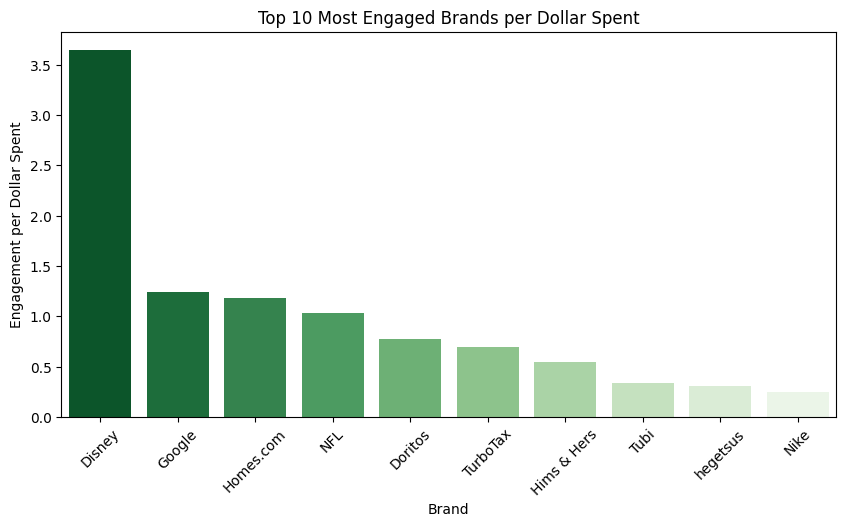

In [6]:
# Ensure total engagement column exists
df['total_engagement'] = (df['public_metrics.retweet_count'] +
                          df['public_metrics.reply_count'] +
                          df['public_metrics.like_count'] +
                          df['public_metrics.quote_count'] +
                          df['public_metrics.bookmark_count'])

# Spending data for top brands
spending_data = {
    "Disney": 8_000_000,
    "Homes.com": 18_800_000,
    "Google": 16_000_000,
    "Nike": 73_600_000,
    "NFL": 16_000_000,
    "TurboTax": 17_400_000,
    "Hims & Hers": 16_000_000,
    "Doritos": 8_000_000,
    "Tubi": 16_000_000,
    "hegetsus": 16_000_000
}

# Get top 10 engaged brands
top_brands = df.groupby('brand')['total_engagement'].sum().sort_values(ascending=False).head(10)

# Normalize engagement per brand spending
top_brands_spending = top_brands / top_brands.index.map(spending_data)
top_brands_spending = top_brands_spending.sort_values(ascending=False)


# Plot Top 10 Brands Engagement per Ad Spend
plt.figure(figsize=(10, 5))
sns.barplot(x=top_brands_spending.index, y=top_brands_spending.values, palette='Greens_r')
plt.xlabel("Brand")
plt.ylabel("Engagement per Dollar Spent")
plt.title("Top 10 Most Engaged Brands per Dollar Spent")
plt.xticks(rotation=45)
plt.show()

In [7]:
print("Top Brands Engagement per Ad Spend:")
print(top_brands_spending)

Top Brands Engagement per Ad Spend:
brand
Disney         3.644526
Google         1.238787
Homes.com      1.186733
NFL            1.034288
Doritos        0.773611
TurboTax       0.690913
Hims & Hers    0.549955
Tubi           0.340743
hegetsus       0.304248
Nike           0.245931
dtype: float64


In [8]:
print(18100551/16000000)

1.1312844375


<ipython-input-9-bafec8451776>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_engagement', y='brand', data=top_brands, palette="viridis")


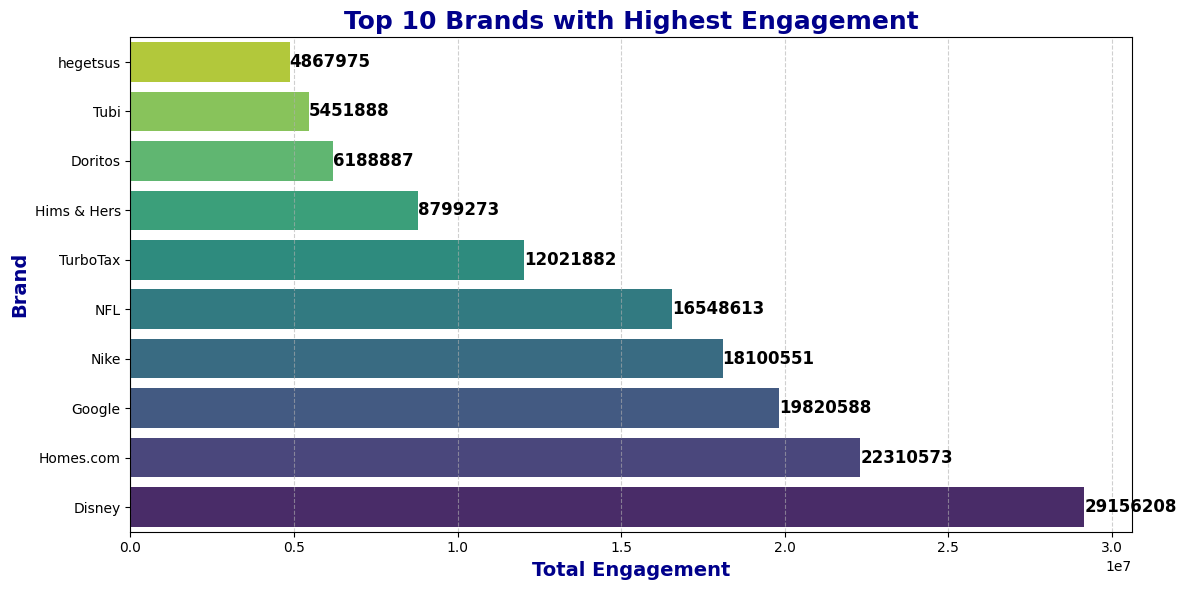

In [9]:
df['total_engagement'] = (df['public_metrics.retweet_count'] +
                          df['public_metrics.reply_count'] +
                          df['public_metrics.like_count'] +
                          df['public_metrics.quote_count'] +
                          df['public_metrics.bookmark_count'])

# Aggregate engagement by brand (make sure it's a DataFrame)
brand_engagement = df.groupby('brand')['total_engagement'].sum().reset_index()

# Sort by highest engagement and select top brands (top 10)
top_brands = brand_engagement.sort_values(by='total_engagement', ascending=False).head(10)

# Create the bar chart with the proper DataFrame
plt.figure(figsize=(12, 6))

# Use the seaborn barplot with the correct DataFrame
sns.barplot(x='total_engagement', y='brand', data=top_brands, palette="viridis")

# Add titles and labels with customized font sizes and weights
plt.title("Top 10 Brands with Highest Engagement", fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel("Total Engagement", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Brand", fontsize=14, fontweight='bold', color='darkblue')

# Add the total engagement value to each bar
for index, value in enumerate(top_brands['total_engagement']):
    plt.text(value + 1000, index, f'{value}', va='center', fontsize=12, fontweight='bold', color='black')

# Customize gridlines
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Invert the y-axis so the highest values are at the top
plt.gca().invert_yaxis()

# Apply tight layout to ensure no overlap and space is used efficiently
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-10-985e057b1560>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values / 8_000_000, palette='Greens_r')


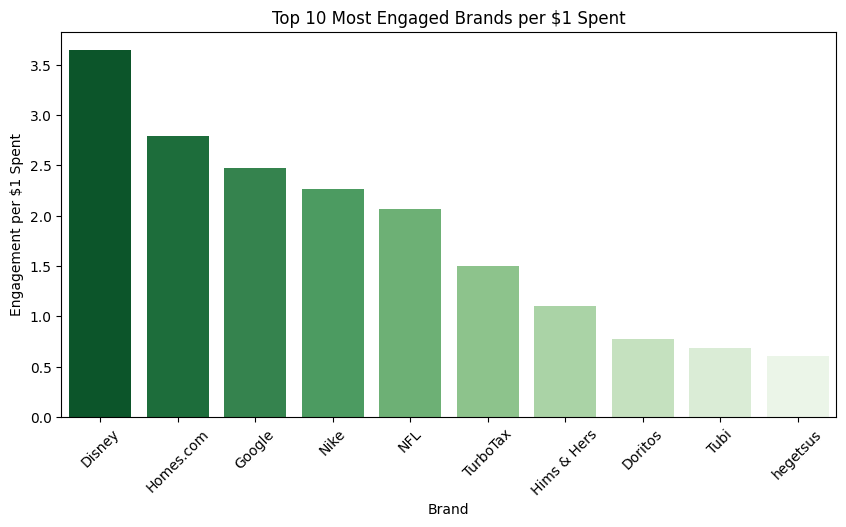

In [10]:
# Calculate engagement per $1 spent (assuming each brand paid $8M)
df['engagement_per_dollar'] = df['total_engagement'] / 8_000_000

# Get top 10 engaged brands
top_brands = df.groupby('brand')['total_engagement'].sum().sort_values(ascending=False).head(10)


# Plot Top 10 Brands Engagement per $1 Spent
plt.figure(figsize=(10, 5))
sns.barplot(x=top_brands.index, y=top_brands.values / 8_000_000, palette='Greens_r')
plt.xlabel("Brand")
plt.ylabel("Engagement per $1 Spent")
plt.title("Top 10 Most Engaged Brands per $1 Spent")
plt.xticks(rotation=45)
plt.show()

<ipython-input-11-7e0338c3aa54>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='engagement_rate', y='brand', data=top_brands, palette="magma")


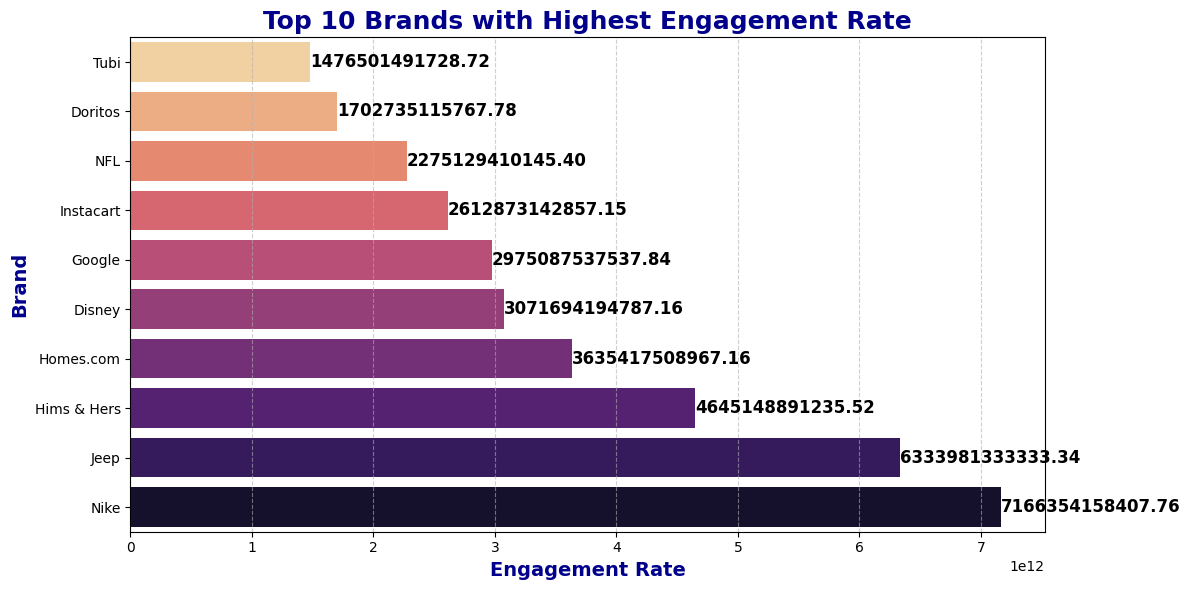

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure total engagement is correctly defined
df['total_engagement'] = (
    df['public_metrics.retweet_count'] +
    df['public_metrics.reply_count'] +
    df['public_metrics.like_count'] +
    df['public_metrics.quote_count'] +
    df['public_metrics.bookmark_count']
)

# Avoid division by zero
df['engagement_rate'] = df['total_engagement'] / (df['public_metrics.impression_count'] + 1e-9)

# Aggregate engagement rate by brand
brand_engagement = df.groupby('brand')['engagement_rate'].mean().reset_index()

# Sort and select top 10 brands
top_brands = brand_engagement.sort_values(by='engagement_rate', ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='engagement_rate', y='brand', data=top_brands, palette="magma")

# Add titles and labels
plt.title("Top 10 Brands with Highest Engagement Rate", fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel("Engagement Rate", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Brand", fontsize=14, fontweight='bold', color='darkblue')

# Add engagement rate values on bars
for index, value in enumerate(top_brands['engagement_rate']):
    plt.text(value + 0.0001, index, f'{value:.2f}', va='center', fontsize=12, fontweight='bold', color='black')

# Customize gridlines
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Invert y-axis so the highest engagement is on top
plt.gca().invert_yaxis()

# Apply tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103290 entries, 0 to 123146
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   created_at                       103290 non-null  object 
 1   text                             103290 non-null  object 
 2   conversation_id                  103290 non-null  int64  
 3   reply_settings                   103290 non-null  object 
 4   edit_history_tweet_ids           103290 non-null  object 
 5   lang                             103290 non-null  object 
 6   referenced_tweets                103290 non-null  object 
 7   possibly_sensitive               103290 non-null  bool   
 8   id                               103290 non-null  int64  
 9   author_id                        103290 non-null  int64  
 10  entities.mentions                103290 non-null  object 
 11  public_metrics.retweet_count     103290 non-null  int64  
 12  public_

In [13]:
df.describe()

,conversation_id,id,author_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.bookmark_count,public_metrics.impression_count,edit_controls.edits_remaining,total_engagement,engagement_per_dollar,engagement_rate
count,1.032900e+05,1.032900e+05,1.032900e+05,103290.000000,103290.000000,103290.000000,103290.000000,103290.000000,103290.000000,103290.000000,103290.000000,103290.000000,1.032900e+05
mean,1.888388e+18,1.888786e+18,7.792534e+17,1508.921464,0.074015,0.526121,0.001384,0.008607,48.143218,4.999787,1509.531591,0.000189,1.506180e+12
std,1.089131e+16,7.329651e+12,7.582379e+17,5089.521390,0.490252,18.956523,0.044092,0.308611,979.797775,0.014593,5089.377884,0.000636,5.085977e+12
min,8.500303e+17,1.888651e+18,1.022100e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000e+00
25%,1.888781e+18,1.888786e+18,4.553872e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000e+00
50%,1.888787e+18,1.888788e+18,8.608652e+17,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,33.000000,0.000004,3.100000e+10
75%,1.888788e+18,1.888788e+18,1.520896e+18,781.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,781.000000,0.000098,7.790000e+11
max,1.888789e+18,1.888789e+18,1.888788e+18,115874.000000,69.000000,4632.000000,6.000000,63.000000,165742.000000,5.000000,115874.000000,0.014484,1.158740e+14


In [14]:
df['total_engagement'] = (df['public_metrics.retweet_count'] +
                          df['public_metrics.reply_count'] +
                          df['public_metrics.like_count'] +
                          df['public_metrics.quote_count'] +
                          df['public_metrics.bookmark_count']/
                          df['public_metrics.impression_count'])

In [15]:
df['total_engagement'] = df['total_engagement'].fillna(0)
#df['total_engagement'] = df['total_engagement'].astype(int)
df = df.drop_duplicates(subset=['id'])  # Assuming 'id' is the unique identifier

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52043 entries, 0 to 123146
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   created_at                       52043 non-null  object 
 1   text                             52043 non-null  object 
 2   conversation_id                  52043 non-null  int64  
 3   reply_settings                   52043 non-null  object 
 4   edit_history_tweet_ids           52043 non-null  object 
 5   lang                             52043 non-null  object 
 6   referenced_tweets                52043 non-null  object 
 7   possibly_sensitive               52043 non-null  bool   
 8   id                               52043 non-null  int64  
 9   author_id                        52043 non-null  int64  
 10  entities.mentions                52043 non-null  object 
 11  public_metrics.retweet_count     52043 non-null  int64  
 12  public_metrics.reply_c

In [17]:
# Calculate the total sum of total_engagement
df['total_engagement'] = (df['public_metrics.retweet_count'] +
                          df['public_metrics.reply_count'] +
                          df['public_metrics.like_count'] +
                          df['public_metrics.quote_count'] +
                          df['public_metrics.bookmark_count']+
                          df['public_metrics.impression_count'])
total_engagement_sum = df['total_engagement'].sum()

print("Total Engagement Sum:", total_engagement_sum)

Total Engagement Sum: 132188536


<ipython-input-17-058ef92492e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_engagement'] = (df['public_metrics.retweet_count'] +


In [18]:
brand_counts = df['brand'].value_counts()

# To get the total number of brands (unique brands)
total_brands = df['brand'].nunique()

print("Brand counts:\n", brand_counts)
print("\nTotal unique brands:", total_brands)

Brand counts:
 brand
Disney                  5276
Homes.com               5131
NFL                     4936
Google                  3871
Dunkin'                 3834
Bud Light               3230
hegetsus                3092
TurboTax                2779
Lays                    2132
Doritos                 1872
Tubi                    1869
Hims & Hers             1570
Nike                    1499
DoorDash                1453
Little Caesars           813
Instacart                787
Michelob Ultra           600
Fetch                    559
Meta                     556
openai                   526
Coffee mate              459
FanDuel                  421
Taco Bell                399
Budweiser                386
Ram                      371
Jeep                     364
Poppi                    321
Dove                     283
Novartis                 254
Stella Artois            181
Squarespace              172
MSC Cruises              160
RedBull                  152
Nerds                 

In [19]:
# Convert the 'created_at' column to datetime format if not already
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# df['created_at'] = df['created_at'].dt.tz_localize('UTC', ambiguous='NaT')

# Convert 'created_at' from UTC to Eastern Time (ET)
df['created_at'] = df['created_at'].dt.tz_convert('US/Eastern')

# Verify the conversion
print(df['created_at'].head(20))

0    2025-02-09 22:16:57-05:00
1    2025-02-09 22:16:49-05:00
5    2025-02-09 22:16:45-05:00
6    2025-02-09 22:16:45-05:00
7    2025-02-09 22:16:43-05:00
9    2025-02-09 22:16:40-05:00
12   2025-02-09 22:16:37-05:00
16   2025-02-09 22:16:27-05:00
18   2025-02-09 22:16:23-05:00
19   2025-02-09 22:16:16-05:00
20   2025-02-09 22:16:15-05:00
22   2025-02-09 22:16:04-05:00
24   2025-02-09 22:15:57-05:00
25   2025-02-09 22:15:57-05:00
26   2025-02-09 22:15:57-05:00
27   2025-02-09 22:15:53-05:00
28   2025-02-09 22:15:42-05:00
29   2025-02-09 22:15:38-05:00
44   2025-02-09 22:15:30-05:00
45   2025-02-09 22:15:26-05:00
Name: created_at, dtype: datetime64[ns, US/Eastern]


In [20]:
print(df['created_at'].tail(20))

123116   2025-02-09 21:42:07-05:00
123117   2025-02-09 21:41:46-05:00
123118   2025-02-09 21:41:42-05:00
123119   2025-02-09 21:41:41-05:00
123121   2025-02-09 21:41:12-05:00
123124   2025-02-09 21:41:03-05:00
123127   2025-02-09 21:40:19-05:00
123128   2025-02-09 21:40:05-05:00
123129   2025-02-09 21:40:01-05:00
123130   2025-02-09 21:39:58-05:00
123131   2025-02-09 21:39:50-05:00
123132   2025-02-09 21:39:48-05:00
123133   2025-02-09 21:39:46-05:00
123134   2025-02-09 21:39:37-05:00
123137   2025-02-09 21:39:15-05:00
123138   2025-02-09 21:39:02-05:00
123139   2025-02-09 21:39:01-05:00
123140   2025-02-09 21:39:01-05:00
123143   2025-02-09 21:37:47-05:00
123146   2025-02-09 21:37:19-05:00
Name: created_at, dtype: datetime64[ns, US/Eastern]


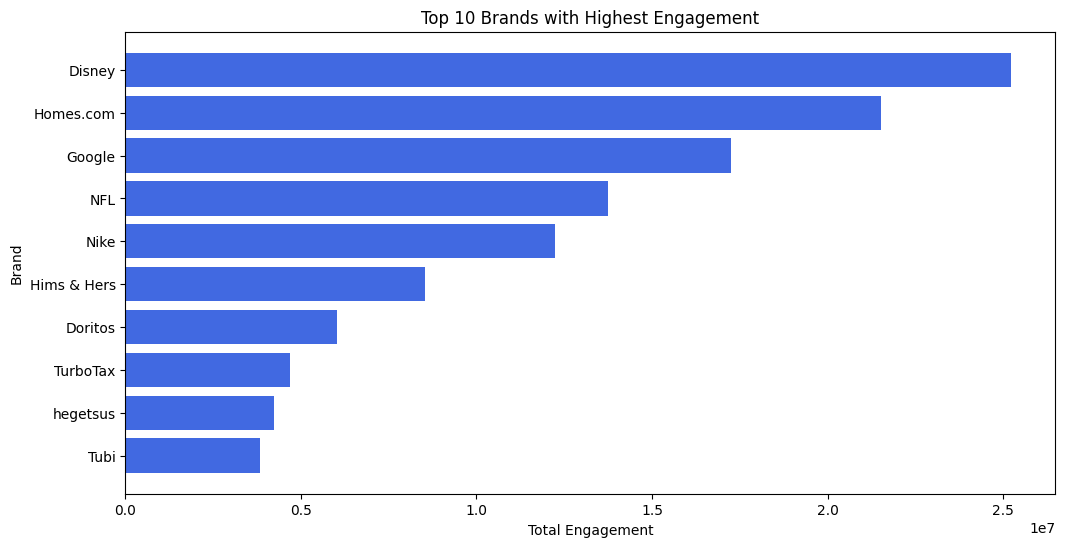

In [21]:
df['total_engagement'] = (df['public_metrics.retweet_count'] +
                          df['public_metrics.reply_count'] +
                          df['public_metrics.like_count'] +
                          df['public_metrics.quote_count'] +
                          df['public_metrics.bookmark_count'])

# Aggregate engagement by brand
brand_engagement = df.groupby('brand')['total_engagement'].sum().reset_index()

# Sort by highest engagement and select top brands
top_brands = brand_engagement.sort_values(by='total_engagement', ascending=False).head(10)

# Plot the top brands
plt.figure(figsize=(12, 6))
plt.barh(top_brands['brand'], top_brands['total_engagement'], color='royalblue')
plt.xlabel("Total Engagement")
plt.ylabel("Brand")
plt.title("Top 10 Brands with Highest Engagement")
plt.gca().invert_yaxis()  # Invert to have the highest at the top
plt.show()

In [22]:
#from google.colab import files
# files.download('/content/created_at_column.csv')

FileNotFoundError: Cannot find file: /content/created_at_column.csv

In [ ]:
# Set pandas option to display all rows
#pd.set_option('display.max_rows', None)

# Print the 'created_at' column
#print(df['created_at'])

# Reset to default to avoid printing too many rows next time
#pd.reset_option('display.max_rows')
#print(df['created_at'])

In [ ]:
def extract_hashtags(text):
    return re.findall(r'#\w+', text.lower()) if isinstance(text, str) else []

# Apply function to extract hashtags
df['hashtags'] = df['text'].apply(extract_hashtags)

# Flatten the list of hashtags and count occurrences
all_hashtags = [hashtag for hashtags in df['hashtags'] for hashtag in hashtags]
hashtag_counts = Counter(all_hashtags)

# Get the top 10 hashtags
top_10_hashtags = hashtag_counts.most_common(10)

# Convert to DataFrame for visualization
top_hashtags_df = pd.DataFrame(top_10_hashtags, columns=['Hashtag', 'Count'])

# Display the top 10 hashtags
print(top_hashtags_df)

In [ ]:
# Select only the public_metrics columns and compute the correlation matrix
public_metrics_columns = [col for col in df.columns if 'public_metrics' in col]
corr_matrix = df[public_metrics_columns].corr()

# Set the style for the plot
sns.set(style="whitegrid", palette="muted")

# Create the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))  # Increase figure size for better clarity
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={"size": 12}, vmin=-1, vmax=1)

# Title and axis labels with a modern font and styling
plt.title("Correlation Matrix of Public Metrics", fontsize=18, fontweight='bold', color="navy", pad=20)
plt.xticks(fontsize=12, rotation=45, ha="right", color="darkblue")
plt.yticks(fontsize=12, rotation=0, color="darkblue")

# Add a border for clarity
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['top'].set_color('gray')
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['right'].set_color('gray')
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['bottom'].set_color('gray')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
public_metrics_columns = [col for col in df.columns if 'public_metrics' in col]

# Select only the public_metrics columns and compute the correlation matrix
corr_matrix = df[public_metrics_columns].corr()

# Create the heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Public Metrics")
plt.show()

In [ ]:
# Convert the 'created_at' column to datetime format
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Set 'created_at' as the index of the dataframe
df.set_index('created_at', inplace=True)

# Resample by 30-second intervals and count the number of tweets per interval
tweets_per_30_seconds = df.resample('10min').size()

# Plot the number of tweets per 30-second interval
plt.figure(figsize=(12, 6))
tweets_per_30_seconds.plot(kind='line', color='royalblue', lw=2)

# Add titles and labels
plt.title('Number of Tweets Per 30 Seconds', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
hashtags = ['#sblix', '#sweepstakes', '#playforultra', '#onlylays', '#superbowllix',
            '#superbowl', '#thisbudsforyou', '#nfl', '#doritoscrash', '#tombrady']
counts = [22798, 15217, 11458, 8903, 5884, 4852, 4761, 4445, 4280, 2488]

# Set up the style and figure
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Create the bar plot with vibrant colors
sns.barplot(x=counts, y=hashtags, palette="inferno")

# Customize the title and labels with bold and large fonts
plt.title("Top 10 Super Bowl Hashtags", fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel("Count of Mentions", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Hashtags", fontsize=14, fontweight='bold', color='darkblue')

# Add annotation for each bar to show the count on top
for i, count in enumerate(counts):
    plt.text(count + 50, i, str(count), va='center', fontsize=12, fontweight='bold', color='white')

# Customize gridlines and axes
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, color='darkgreen')
plt.yticks(fontsize=12, color='darkgreen')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Extract hour for brand engagement timing
df['tweet_hour'] = df['created_at'].dt.hour

# Group by brand and count tweets
brand_tweet_counts = df.groupby('brand').size().reset_index(name='tweet_count')

# Sort brands by tweet count
brand_tweet_counts = brand_tweet_counts.sort_values(by='tweet_count', ascending=False)

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=brand_tweet_counts, x='brand', y='tweet_count', palette="viridis")

# Customize chart
plt.xticks(rotation=45, ha="right")
plt.xlabel("Brand")
plt.ylabel("Tweet Count")
plt.title("Super Bowl Tweet Count by Brand")
plt.show()

In [ ]:
#plt.figure(figsize=(12,6))
# sns.histplot(data=df, x='tweet_hour', hue='brand', multiple="stack", bins=24, palette="tab10")

# Customize chart
#plt.xlabel("Hour of the Day")
#plt.ylabel("Tweet Count")
#plt.title("Super Bowl Tweet Engagement by Hour & Brand")
#plt.legend(title="Brand", bbox_to_anchor=(1,1))
#plt.show()

In [ ]:
# Ensure 'created_at' is in datetime format
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce', utc=True)

# Calculate average created_at time per brand
avg_created_at = df.groupby('brand')['created_at'].mean().dropna()

# Calculate total engagement per brand
total_engagement_per_brand = df.groupby('brand')['total_engagement'].sum()

# Merge both calculations into a DataFrame
brand_engagement_df = pd.DataFrame({'avg_created_at': avg_created_at, 'total_engagement': total_engagement_per_brand})

# Sort values by created_at time for better visualization
brand_engagement_df = brand_engagement_df.sort_values(by='avg_created_at')

# Plot the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(brand_engagement_df['avg_created_at'], brand_engagement_df['total_engagement'], color='blue')

# Annotate each point with the brand name
for brand, row in brand_engagement_df.iterrows():
    plt.text(row['avg_created_at'], row['total_engagement'], brand, fontsize=9, ha='right')

# Formatting the chart
plt.xlabel("Average Created At Time (UTC)")
plt.ylabel("Total Engagement")
plt.title("Total Engagement vs. Average Created Time per Brand")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce').dt.tz_convert('UTC')

# Display brand and corresponding tweet timestamps
df_brand_times = df[['brand', 'created_at']].dropna().sort_values(by=['brand', 'created_at'])

# Display the first few rows
print(df_brand_times.head(20))  # Adjust the number of rows as needed

In [ ]:
print(df_brand_times.tail(20))

In [ ]:
# Ensure 'created_at' is in datetime format and UTC timezone
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce').dt.tz_convert('UTC')

# Sample dictionary mapping brands to their ad airing time (update with actual times)
brand_ad_times = {
    'BrandA': '2024-02-11 18:30:00',
    'BrandB': '2024-02-11 18:45:00',
    'BrandC': '2024-02-11 19:00:00',
    'BrandD': '2024-02-11 19:15:00',
    'BrandE': '2024-02-11 19:30:00',
}

# Convert ad times to datetime and set to UTC timezone
brand_ad_times = {k: pd.to_datetime(v).tz_localize('UTC') for k, v in brand_ad_times.items()}

# Set time window for filtering (e.g., 10 minutes before & after the ad)
time_window = pd.Timedelta(minutes=10)

df_filtered = pd.DataFrame()
for brand, ad_time in brand_ad_times.items():
    temp_df = df[(df['brand'] == brand) &
                 (df['created_at'] >= ad_time - time_window) &
                 (df['created_at'] <= ad_time + time_window)]
    df_filtered = pd.concat([df_filtered, temp_df])

# Plot scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_filtered, x='created_at', y='total_engagement', hue='brand', style='brand', s=100, palette="tab10")

# Customize chart
plt.xlabel("Time (Ad Aired)")
plt.ylabel("Total Engagement")
plt.title("Super Bowl Ad Engagement Over Time")
plt.xticks(rotation=45)
plt.legend(title="Brand", bbox_to_anchor=(1,1))
plt.grid(True)

# Show plot
plt.show()

In [ ]:
positive_words = ['great', 'awesome', 'amazing', 'love', 'excellent','dominating', 'fantastic','MVP','shout out','wonderful','clutch', 'best','better', 'good', 'like', 'enjoy', 'happy', 'positive', 'greatest', 'incredible','nice','nicer', 'favorite', 'excellent', 'superb', 'outstanding', 'remarkable', 'fabulous', 'delightful', 'pleasurable','enjoyed', 'satisfied', 'pleased', 'thrilled', 'joyful', 'cheerful', 'content', 'ecstatic', 'elated', 'exhilarated','amused','entertained','funny','fun','hilarious','delighted','grateful','thankful','appreciative','optimistic','hopeful']

negative_words = ['awful', 'terrible','boycott','weird','boycotted','bad','trash','garbage','satan','do better','forbade','worst', 'hate','quit','poor','dumb','never', 'horrible','disappointing', 'sad', 'angry', 'negative', 'unpleasant', 'dreadful', 'atrocious', 'abysmal', 'appalling', 'deplorable', 'distressing', 'unfortunate','sucked', 'sucks', 'disgusting', 'unhappy','lame', 'regret', 'regrettable', 'unfavorable', 'undesirable', 'unwelcome']

# Function to clean text
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
def classify_sentiment(text):
    words = text.split()
    pos_count = sum(1 for word in words if word in positive_words)
    neg_count = sum(1 for word in words if word in negative_words)

    if pos_count > neg_count:
        return 'Positive'
    elif neg_count > pos_count:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['clean_text'].apply(classify_sentiment)

In [ ]:
# Define engagement as sum of retweets, replies, likes, and quotes
df['engagement'] = df['public_metrics.retweet_count'] + df['public_metrics.reply_count'] + df['public_metrics.like_count'] + df['public_metrics.quote_count']

# Get top 5 brands by engagement
top_brands = df.groupby('brand')['engagement'].sum().nlargest(5).index.tolist()

# Filter dataset for top 5 brands
df_top_brands = df[df['brand'].isin(top_brands)]

In [ ]:
# Count sentiment per brand
brand_sentiment = df_top_brands.groupby(['brand', 'sentiment']).size().unstack(fill_value=0)

# Normalize for percentage
brand_sentiment_percentage = brand_sentiment.div(brand_sentiment.sum(axis=1), axis=0) * 100

# Plot Sentiment Distribution
brand_sentiment_percentage.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')

plt.title("Sentiment Breakdown for Top 5 Engaged Brands")
plt.ylabel("Percentage of Tweets")
plt.xlabel("Brand")
plt.legend(title="Sentiment")
plt.show()

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce').dt.tz_convert('UTC')

# Display brand and corresponding tweet timestamps
df_brand_times = df[['brand', 'created_at']].dropna().sort_values(by=['brand', 'created_at'])

# Display the first few rows
print(df_brand_times.head(20))  # Adjust the number of rows as needed

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
# Convert 'created_at' to datetime
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')


In [ ]:
# Define Super Bowl Game Phases (Example Time Intervals - Adjust as needed)
first_quarter_start = "2024-02-11 02:30:00"  # Example start time
second_quarter_start = "2024-02-11 02:45:00"
halftime_start = "2024-02-11 03:00:00"
third_quarter_start = "2024-02-11 03:15:00"
fourth_quarter_start = "2024-02-11 03:30:00"
game_end = "2024-02-11 03:45:00"

# Assign engagement phases based on tweet timestamps
conditions = [
    (df['created_at'] >= first_quarter_start) & (df['created_at'] < second_quarter_start),
    (df['created_at'] >= second_quarter_start) & (df['created_at'] < halftime_start),
    (df['created_at'] >= halftime_start) & (df['created_at'] < third_quarter_start),
    (df['created_at'] >= third_quarter_start) & (df['created_at'] < fourth_quarter_start),
    (df['created_at'] >= fourth_quarter_start) & (df['created_at'] <= game_end)
]
choices = ["First Quarter", "Second Quarter", "Halftime", "Third Quarter", "Fourth Quarter"]
df['game_phase'] = np.select(conditions, choices, default="Pre/Post Game")  # Assign phases

# Calculate total engagement per phase
df['total_engagement'] = (
    df['public_metrics.retweet_count'] +
    df['public_metrics.reply_count'] +
    df['public_metrics.like_count'] +
    df['public_metrics.quote_count'] +
    df['public_metrics.bookmark_count']
)

engagement_by_phase = df.groupby('game_phase')[[
    'public_metrics.retweet_count',
    'public_metrics.reply_count',
    'public_metrics.like_count',
    'public_metrics.quote_count',
    'public_metrics.bookmark_count'
]].sum().reset_index()

# 📊 **Plot Engagement per Metric by Super Bowl Phase**
plt.figure(figsize=(12, 6))
engagement_by_phase.set_index('game_phase').plot(kind='bar', stacked=True, colormap='viridis', alpha=0.85)
plt.xlabel("Game Phase")
plt.ylabel("Total Engagement")
plt.title("Total Engagement by Metric During Super Bowl Game Phases")
plt.xticks(rotation=30)
plt.legend(title="Engagement Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
public_metrics_columns = [col for col in df.columns if 'public_metrics' in col]

# Select only the public_metrics columns and compute the correlation matrix
corr_matrix = df[public_metrics_columns].corr()

# Create the heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Public Metrics")
plt.show()

In [ ]:
corr_matrix = df.select_dtypes(include=['number']).corr()

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Public Metrics")
plt.show()

Tweets over time: amount of tweets over time y-axis / x-axis ad  